In [17]:
import pandas as pd
import re
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
#import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('recipes.xlsx')
df.head()

,Name,Description,Facts,Directions,Ingredients,Nutrition,Category,Rating,URL
0,Bourbon Chicken,I searched and finally found this recipe on th...,"{'Ready In:': '35mins', 'Ingredients:': '11', ...",Editor's Note: Named Bourbon Chicken because i...,"2 lbs boneless chicken breasts, cut into bite-...","{'Serving Size': '1 (330) g', 'Servings Per Re...",Chicken Breast,4.58,https://www.food.com/recipe/bourbon-chicken-45809
1,Best Banana Bread,You'll never need another banana bread recipe ...,"{'Ready In:': '1hr 10mins', 'Ingredients:': '8...",Remove odd pots and pans from oven.\nPreheat o...,"1⁄2 cup butter, softened\n1 cup granulated sug...","{'Serving Size': '1 (96) g', 'Servings Per Rec...",Quick Breads,4.81,https://www.food.com/recipe/best-banana-bread-...
2,To Die for Crock Pot Roast,"Amazing flavor, and so simple! No salt needed ...","{'Ready In:': '9hrs 5mins', 'Ingredients:': '5...",Place beef roast in crock pot.\nMix the dried ...,"1 (4 -5 lb) beef roast, any kind\n1 (1 1/4 oun...","{'Serving Size': '1 (245) g', 'Servings Per Re...",One-Dish Meal,4.58,https://www.food.com/recipe/to-die-for-crock-p...
3,Crock-Pot Chicken With Black Beans & Cream Cheese,I love this Crock-Pot chicken recipe for two r...,"{'Ready In:': '4hrs 3mins', 'Ingredients:': '5...","Take 4-5 frozen, yes, frozen, boneless chicken...","4 -5 boneless chicken breasts, frozen\n1 (15 1...","{'Serving Size': '1 (493) g', 'Servings Per Re...",One-Dish Meal,4.46,https://www.food.com/recipe/crock-pot-chicken-...
4,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,"{'Ready In:': '25mins', 'Ingredients:': '12', ...",Place chicken and Cajun seasoning in a bowl an...,"2 boneless skinless chicken breast halves, cut...","{'Serving Size': '1 (373) g', 'Servings Per Re...",Chicken Breast,4.84,https://www.food.com/recipe/creamy-cajun-chick...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11694 entries, 0 to 11693
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         11694 non-null  object 
 1   Description  11351 non-null  object 
 2   Facts        11694 non-null  object 
 3   Directions   11694 non-null  object 
 4   Ingredients  11694 non-null  object 
 5   Nutrition    11694 non-null  object 
 6   Category     11691 non-null  object 
 7   Rating       11694 non-null  float64
 8   URL          11694 non-null  object 
dtypes: float64(1), object(8)
memory usage: 822.4+ KB


In [4]:
df['Category'].unique()

array(['Chicken Breast', 'Quick Breads', 'One-Dish Meal', 'Drop Cookies',
       'Dessert', 'Meatloaf', 'Spaghetti', 'Bars', 'Beverages',
       'Breakfast', 'Meat', 'Chicken Thigh & Leg', 'Potato', 'Breads',
       'Winter', 'Whole Chicken', 'Lunch', 'Pork', 'Chicken',
       'Cookie and Brownie', 'Long-Grain Rice', 'Clear Soups', 'Sauces',
       'Cheese', 'Oven', 'Tilapia', '< 60 Mins', 'Vegetable',
       'Black Beans', 'Very Low Carbs', 'Yeast', 'Pie', 'Lentils', 'Tuna',
       'Poultry', 'Penne', 'Oranges', 'Cauliflower', 'Greek', 'Candy',
       'Ham', '< 30 Mins', 'Steak', 'Summer', 'Tex-Mex', 'Stew',
       'Mexican', 'Chowders', 'High Protein', 'Grains', 'Whole Turkey',
       'Kid-Friendly', 'Low Cholesterol', 'Roast Beef',
       'Chocolate Chip Cookies', 'Spreads', 'Fruit', 'Low Protein',
       '< 15 Mins', 'Corn', 'Yam/Sweet Potato', 'Roast', 'European',
       'Norwegian', 'Salad Dressings', 'Cheesecake', 'Onions',
       'Household Cleaners', 'Beans', 'Chinese', 'Curri

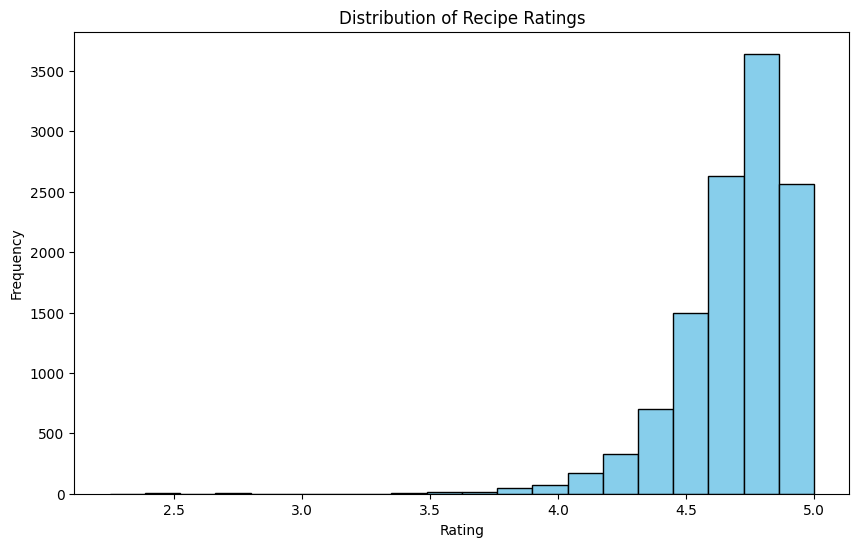

In [5]:
plt.figure(figsize=(10, 6))
df['Rating'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

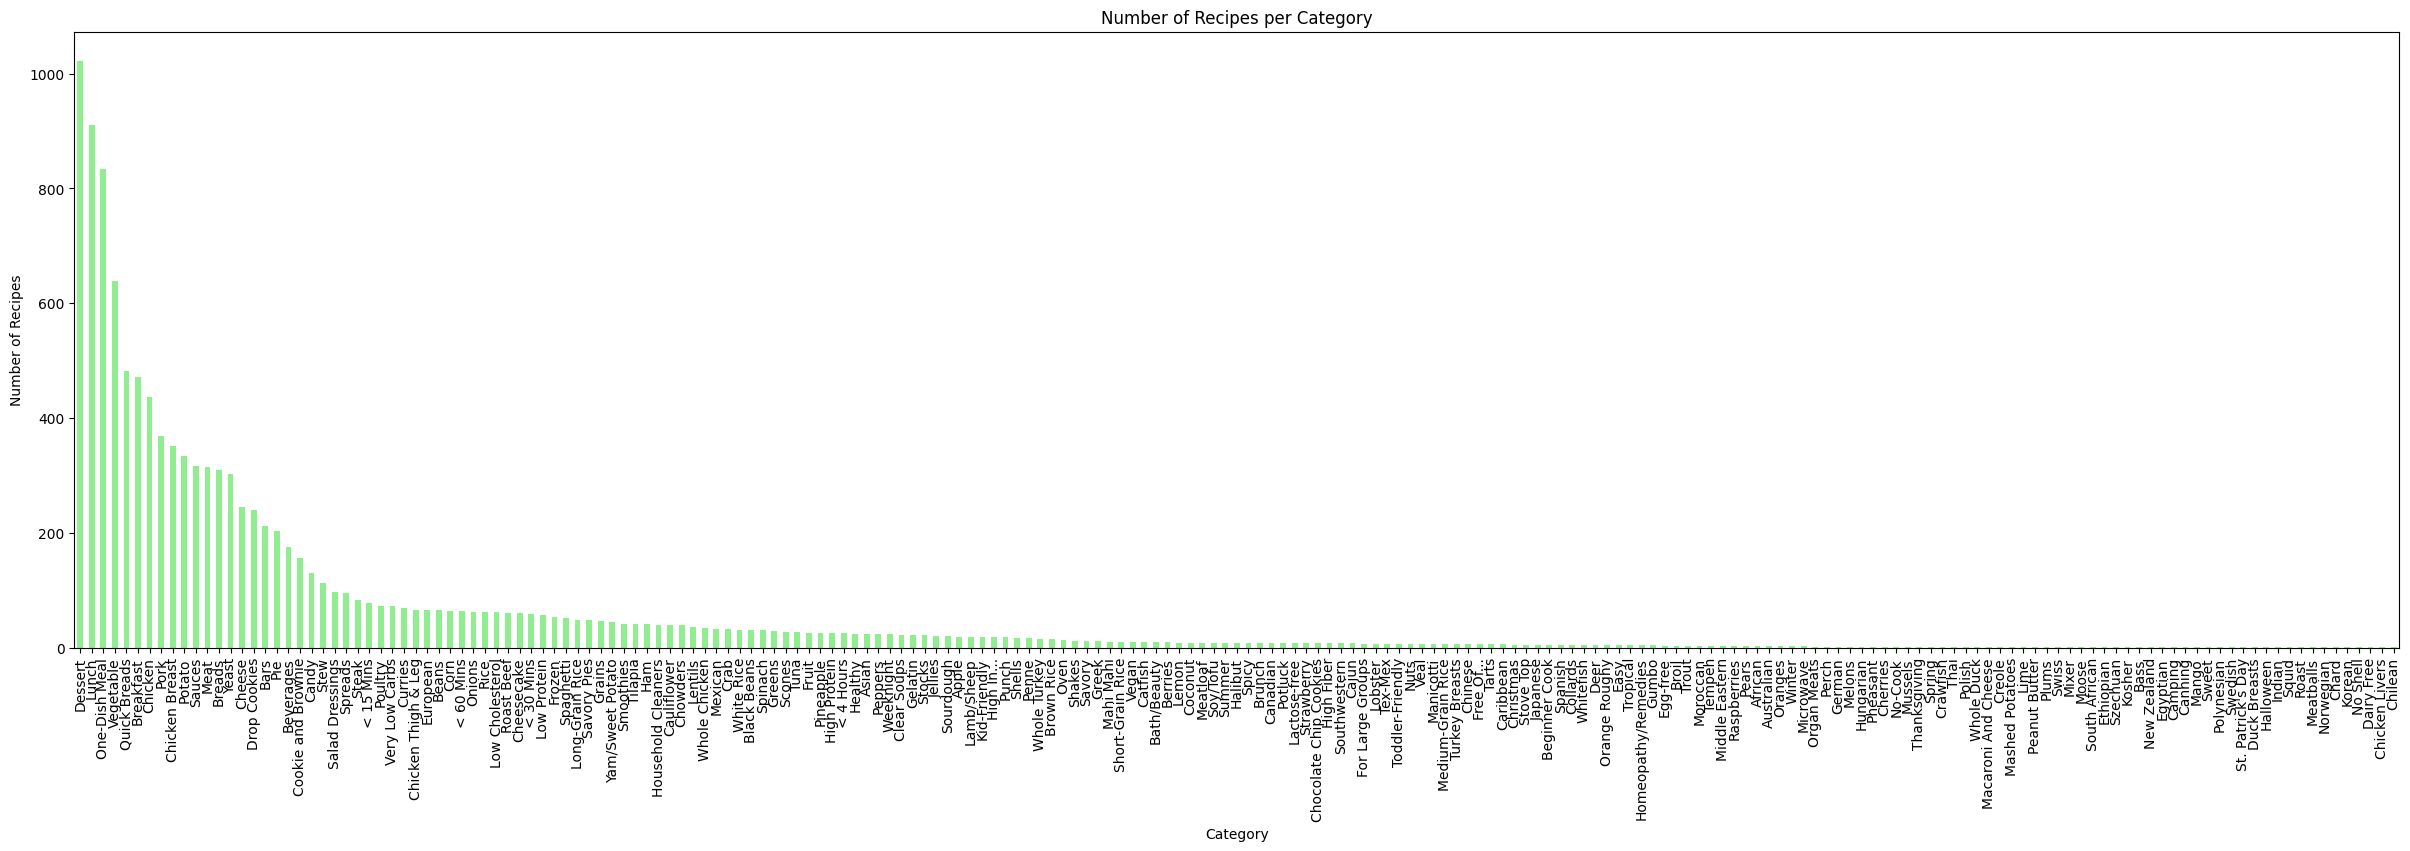

In [6]:
plt.figure(figsize=(30, 8))
df['Category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Number of Recipes per Category')
plt.xlabel('Category')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=90)
plt.show()

In [7]:
# preparation of facts column
all_keys = []
for facts in df['Facts']:
    try:
        facts_dict = json.loads(facts.replace("'", '"'))
        all_keys.extend(facts_dict.keys())
    except json.JSONDecodeError:
        continue
unique_keys = set(all_keys)
unique_keys

{'Ingredients:', 'Ready In:', 'Serves:', 'Yields:'}

In [8]:
def extract_facts(x):
    try:
        data = json.loads(x['Facts'].replace('"', " ").replace("'", '"'))
        for k in unique_keys:
            key = f"Fact_{k.replace(':', '')}"
            x[key] = data.get(k, None)
        return x
    except Exception as e:
        print(x)
        print(e)

df = df.apply(extract_facts, axis=1)

Name                                                  Olga Bread
Description    Olga bread just like from the restaurants. I f...
Facts          {'Ready In:': '45mins', 'Ingredients:': '9', '...
Directions     Scald milk, remove to large bowl.\nAdd honey, ...
Ingredients    1 cup milk\n1⁄4 cup honey\n1⁄4 cup margarine\n...
Nutrition      {'Serving Size': '1 (1013) g', 'Servings Per R...
Category                                                  Breads
Rating                                                      4.71
URL                 https://www.food.com/recipe/olga-bread-79388
Name: 4065, dtype: object
Expecting ',' delimiter: line 1 column 61 (char 60)
Name                                        Coca-Cola Pork Roast
Description    There are lots of cola/meat recipes on this si...
Facts          {'Ready In:': '8hrs 5mins', 'Ingredients:': '4...
Directions     Rub the roast with salt and pepper then place ...
Ingredients    3 -4 lbs roast (I used boneless pork shoulder ...
Nutrition   

In [9]:
df.head()

,Name,Description,Facts,Directions,Ingredients,Nutrition,Category,Rating,URL,Fact_Ready In,Fact_Serves,Fact_Yields,Fact_Ingredients
0,Bourbon Chicken,I searched and finally found this recipe on th...,"{'Ready In:': '35mins', 'Ingredients:': '11', ...",Editor's Note: Named Bourbon Chicken because i...,"2 lbs boneless chicken breasts, cut into bite-...","{'Serving Size': '1 (330) g', 'Servings Per Re...",Chicken Breast,4.58,https://www.food.com/recipe/bourbon-chicken-45809,35mins,4,None,11
1,Best Banana Bread,You'll never need another banana bread recipe ...,"{'Ready In:': '1hr 10mins', 'Ingredients:': '8...",Remove odd pots and pans from oven.\nPreheat o...,"1⁄2 cup butter, softened\n1 cup granulated sug...","{'Serving Size': '1 (96) g', 'Servings Per Rec...",Quick Breads,4.81,https://www.food.com/recipe/best-banana-bread-...,1hr 10mins,10,1 loaf,8
2,To Die for Crock Pot Roast,"Amazing flavor, and so simple! No salt needed ...","{'Ready In:': '9hrs 5mins', 'Ingredients:': '5...",Place beef roast in crock pot.\nMix the dried ...,"1 (4 -5 lb) beef roast, any kind\n1 (1 1/4 oun...","{'Serving Size': '1 (245) g', 'Servings Per Re...",One-Dish Meal,4.58,https://www.food.com/recipe/to-die-for-crock-p...,9hrs 5mins,8,None,5
3,Crock-Pot Chicken With Black Beans & Cream Cheese,I love this Crock-Pot chicken recipe for two r...,"{'Ready In:': '4hrs 3mins', 'Ingredients:': '5...","Take 4-5 frozen, yes, frozen, boneless chicken...","4 -5 boneless chicken breasts, frozen\n1 (15 1...","{'Serving Size': '1 (493) g', 'Servings Per Re...",One-Dish Meal,4.46,https://www.food.com/recipe/crock-pot-chicken-...,4hrs 3mins,4,None,5
4,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,"{'Ready In:': '25mins', 'Ingredients:': '12', ...",Place chicken and Cajun seasoning in a bowl an...,"2 boneless skinless chicken breast halves, cut...","{'Serving Size': '1 (373) g', 'Servings Per Re...",Chicken Breast,4.84,https://www.food.com/recipe/creamy-cajun-chick...,25mins,2,None,12


In [10]:
# Function to extract specific nutrition information

keys = ['Serving Size', 'Servings Per Recipe', 'Calories from Fat', 'Total Fat', 'Saturated Fat', 'Cholesterol',
        'Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Protein']

def extract_quantity(text):
    if "mg" in text:
        return float(text.replace("mg", "").strip())
    elif "g" in text:
        grams = float(text.replace("g", "").strip())
        return grams * 1000
    else:
        return float(text.strip())

def extract_nutrition_info(x):
    try:
        nutrition = json.loads(x['Nutrition'].replace("'", '"'))
    
        for k in keys:
            for key in nutrition:
                if key.startswith(k):
                    if(k in keys[0:2]):
                        x[k] = nutrition.get(key)
                    else:
                        x[f"{k} DV"] = int(nutrition.get(key).replace("%", "").strip())
                        x[k] = extract_quantity(key.replace(k, ''))
        return x
    except Exception as e:
        print(x)
        print(e)

df = df.apply(extract_nutrition_info, axis=1)

Name                None
Description         None
Facts               None
Directions          None
Ingredients         None
Nutrition           None
Category            None
Rating               NaN
URL                 None
Fact_Ready In       None
Fact_Serves         None
Fact_Yields         None
Fact_Ingredients    None
Name: 4065, dtype: object
'NoneType' object has no attribute 'replace'
Name                None
Description         None
Facts               None
Directions          None
Ingredients         None
Nutrition           None
Category            None
Rating               NaN
URL                 None
Fact_Ready In       None
Fact_Serves         None
Fact_Yields         None
Fact_Ingredients    None
Name: 4584, dtype: object
'NoneType' object has no attribute 'replace'
Name                None
Description         None
Facts               None
Directions          None
Ingredients         None
Nutrition           None
Category            None
Rating               NaN
URL     

In [11]:
df.head()

,Name,Description,Facts,Directions,Ingredients,Nutrition,Category,Rating,URL,Fact_Ready In,Fact_Serves,Fact_Yields,Fact_Ingredients,Serving Size,Servings Per Recipe,Calories from Fat DV,Calories from Fat,Total Fat DV,Total Fat,Saturated Fat DV,Saturated Fat,Cholesterol DV,Cholesterol,Sodium DV,Sodium,Total Carbohydrate DV,Total Carbohydrate,Dietary Fiber DV,Dietary Fiber,Sugars DV,Sugars,Protein DV,Protein
0,Bourbon Chicken,I searched and finally found this recipe on th...,"{'Ready In:': '35mins', 'Ingredients:': '11', ...",Editor's Note: Named Bourbon Chicken because i...,"2 lbs boneless chicken breasts, cut into bite-...","{'Serving Size': '1 (330) g', 'Servings Per Re...",Chicken Breast,4.58,https://www.food.com/recipe/bourbon-chicken-45809,35mins,4,None,11,1 (330) g,4,42.0,220000.0,37.0,24500.0,32.0,6500.0,48.0,145.3,65.0,1573.0,7.0,23400.0,1.0,300.0,85.0,21500.0,100.0,50100.0
1,Best Banana Bread,You'll never need another banana bread recipe ...,"{'Ready In:': '1hr 10mins', 'Ingredients:': '8...",Remove odd pots and pans from oven.\nPreheat o...,"1⁄2 cup butter, softened\n1 cup granulated sug...","{'Serving Size': '1 (96) g', 'Servings Per Rec...",Quick Breads,4.81,https://www.food.com/recipe/best-banana-bread-...,1hr 10mins,10,1 loaf,8,1 (96) g,10,35.0,94000.0,16.0,10500.0,31.0,6200.0,20.0,61.6,14.0,338.3,14.0,42500.0,5.0,1400.0,97.0,24400.0,7.0,3700.0
2,To Die for Crock Pot Roast,"Amazing flavor, and so simple! No salt needed ...","{'Ready In:': '9hrs 5mins', 'Ingredients:': '5...",Place beef roast in crock pot.\nMix the dried ...,"1 (4 -5 lb) beef roast, any kind\n1 (1 1/4 oun...","{'Serving Size': '1 (245) g', 'Servings Per Re...",One-Dish Meal,4.58,https://www.food.com/recipe/to-die-for-crock-p...,9hrs 5mins,8,None,5,1 (245) g,8,30.0,87000.0,14.0,9700.0,19.0,3900.0,49.0,149.8,15.0,380.6,0.0,2600.0,0.0,100.0,0.0,0.0,99.0,49500.0
3,Crock-Pot Chicken With Black Beans & Cream Cheese,I love this Crock-Pot chicken recipe for two r...,"{'Ready In:': '4hrs 3mins', 'Ingredients:': '5...","Take 4-5 frozen, yes, frozen, boneless chicken...","4 -5 boneless chicken breasts, frozen\n1 (15 1...","{'Serving Size': '1 (493) g', 'Servings Per Re...",One-Dish Meal,4.46,https://www.food.com/recipe/crock-pot-chicken-...,4hrs 3mins,4,None,5,1 (493) g,4,46.0,315000.0,53.0,35000.0,75.0,15200.0,51.0,155.3,38.0,913.4,16.0,50100.0,44.0,11200.0,39.0,9900.0,91.0,45900.0
4,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,"{'Ready In:': '25mins', 'Ingredients:': '12', ...",Place chicken and Cajun seasoning in a bowl an...,"2 boneless skinless chicken breast halves, cut...","{'Serving Size': '1 (373) g', 'Servings Per Re...",Chicken Breast,4.84,https://www.food.com/recipe/creamy-cajun-chick...,25mins,2,None,12,1 (373) g,2,52.0,370000.0,63.0,41100.0,120.0,24000.0,66.0,198.6,34.0,816.8,15.0,47400.0,10.0,2500.0,12.0,3100.0,78.0,39300.0


In [12]:
def convert_to_minutes(time_str):
    try:
        hour_pattern = re.compile(r'(\d+)\s*hr')
        minute_pattern = re.compile(r'(\d+)\s*min')
        
        # Find all matches for hours and minutes
        hours = hour_pattern.findall(time_str)
        minutes = minute_pattern.findall(time_str)
        
        # Convert matches to integers and calculate total minutes
        total_minutes = 0
        if hours:
            total_minutes += int(hours[0]) * 60
        if minutes:
            total_minutes += int(minutes[0])
        
        return total_minutes
    except Exception as e:
        return 0

df['Fact_Ready In'] = df['Fact_Ready In'].apply(convert_to_minutes)
df.head()

,Name,Description,Facts,Directions,Ingredients,Nutrition,Category,Rating,URL,Fact_Ready In,Fact_Serves,Fact_Yields,Fact_Ingredients,Serving Size,Servings Per Recipe,Calories from Fat DV,Calories from Fat,Total Fat DV,Total Fat,Saturated Fat DV,Saturated Fat,Cholesterol DV,Cholesterol,Sodium DV,Sodium,Total Carbohydrate DV,Total Carbohydrate,Dietary Fiber DV,Dietary Fiber,Sugars DV,Sugars,Protein DV,Protein
0,Bourbon Chicken,I searched and finally found this recipe on th...,"{'Ready In:': '35mins', 'Ingredients:': '11', ...",Editor's Note: Named Bourbon Chicken because i...,"2 lbs boneless chicken breasts, cut into bite-...","{'Serving Size': '1 (330) g', 'Servings Per Re...",Chicken Breast,4.58,https://www.food.com/recipe/bourbon-chicken-45809,35,4,None,11,1 (330) g,4,42.0,220000.0,37.0,24500.0,32.0,6500.0,48.0,145.3,65.0,1573.0,7.0,23400.0,1.0,300.0,85.0,21500.0,100.0,50100.0
1,Best Banana Bread,You'll never need another banana bread recipe ...,"{'Ready In:': '1hr 10mins', 'Ingredients:': '8...",Remove odd pots and pans from oven.\nPreheat o...,"1⁄2 cup butter, softened\n1 cup granulated sug...","{'Serving Size': '1 (96) g', 'Servings Per Rec...",Quick Breads,4.81,https://www.food.com/recipe/best-banana-bread-...,70,10,1 loaf,8,1 (96) g,10,35.0,94000.0,16.0,10500.0,31.0,6200.0,20.0,61.6,14.0,338.3,14.0,42500.0,5.0,1400.0,97.0,24400.0,7.0,3700.0
2,To Die for Crock Pot Roast,"Amazing flavor, and so simple! No salt needed ...","{'Ready In:': '9hrs 5mins', 'Ingredients:': '5...",Place beef roast in crock pot.\nMix the dried ...,"1 (4 -5 lb) beef roast, any kind\n1 (1 1/4 oun...","{'Serving Size': '1 (245) g', 'Servings Per Re...",One-Dish Meal,4.58,https://www.food.com/recipe/to-die-for-crock-p...,545,8,None,5,1 (245) g,8,30.0,87000.0,14.0,9700.0,19.0,3900.0,49.0,149.8,15.0,380.6,0.0,2600.0,0.0,100.0,0.0,0.0,99.0,49500.0
3,Crock-Pot Chicken With Black Beans & Cream Cheese,I love this Crock-Pot chicken recipe for two r...,"{'Ready In:': '4hrs 3mins', 'Ingredients:': '5...","Take 4-5 frozen, yes, frozen, boneless chicken...","4 -5 boneless chicken breasts, frozen\n1 (15 1...","{'Serving Size': '1 (493) g', 'Servings Per Re...",One-Dish Meal,4.46,https://www.food.com/recipe/crock-pot-chicken-...,243,4,None,5,1 (493) g,4,46.0,315000.0,53.0,35000.0,75.0,15200.0,51.0,155.3,38.0,913.4,16.0,50100.0,44.0,11200.0,39.0,9900.0,91.0,45900.0
4,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,"{'Ready In:': '25mins', 'Ingredients:': '12', ...",Place chicken and Cajun seasoning in a bowl an...,"2 boneless skinless chicken breast halves, cut...","{'Serving Size': '1 (373) g', 'Servings Per Re...",Chicken Breast,4.84,https://www.food.com/recipe/creamy-cajun-chick...,25,2,None,12,1 (373) g,2,52.0,370000.0,63.0,41100.0,120.0,24000.0,66.0,198.6,34.0,816.8,15.0,47400.0,10.0,2500.0,12.0,3100.0,78.0,39300.0


In [13]:
def extract_serving(text):
    try:
        pattern = r'\((\d+)\)'
        match = re.search(pattern, text)
        if match:
            return int(match.group(1))
        return 0
    except Exception as e:
        return 1

df['Serving Size'] = df['Serving Size'].apply(extract_serving)

In [14]:
df.head()

,Name,Description,Facts,Directions,Ingredients,Nutrition,Category,Rating,URL,Fact_Ready In,Fact_Serves,Fact_Yields,Fact_Ingredients,Serving Size,Servings Per Recipe,Calories from Fat DV,Calories from Fat,Total Fat DV,Total Fat,Saturated Fat DV,Saturated Fat,Cholesterol DV,Cholesterol,Sodium DV,Sodium,Total Carbohydrate DV,Total Carbohydrate,Dietary Fiber DV,Dietary Fiber,Sugars DV,Sugars,Protein DV,Protein
0,Bourbon Chicken,I searched and finally found this recipe on th...,"{'Ready In:': '35mins', 'Ingredients:': '11', ...",Editor's Note: Named Bourbon Chicken because i...,"2 lbs boneless chicken breasts, cut into bite-...","{'Serving Size': '1 (330) g', 'Servings Per Re...",Chicken Breast,4.58,https://www.food.com/recipe/bourbon-chicken-45809,35,4,None,11,330,4,42.0,220000.0,37.0,24500.0,32.0,6500.0,48.0,145.3,65.0,1573.0,7.0,23400.0,1.0,300.0,85.0,21500.0,100.0,50100.0
1,Best Banana Bread,You'll never need another banana bread recipe ...,"{'Ready In:': '1hr 10mins', 'Ingredients:': '8...",Remove odd pots and pans from oven.\nPreheat o...,"1⁄2 cup butter, softened\n1 cup granulated sug...","{'Serving Size': '1 (96) g', 'Servings Per Rec...",Quick Breads,4.81,https://www.food.com/recipe/best-banana-bread-...,70,10,1 loaf,8,96,10,35.0,94000.0,16.0,10500.0,31.0,6200.0,20.0,61.6,14.0,338.3,14.0,42500.0,5.0,1400.0,97.0,24400.0,7.0,3700.0
2,To Die for Crock Pot Roast,"Amazing flavor, and so simple! No salt needed ...","{'Ready In:': '9hrs 5mins', 'Ingredients:': '5...",Place beef roast in crock pot.\nMix the dried ...,"1 (4 -5 lb) beef roast, any kind\n1 (1 1/4 oun...","{'Serving Size': '1 (245) g', 'Servings Per Re...",One-Dish Meal,4.58,https://www.food.com/recipe/to-die-for-crock-p...,545,8,None,5,245,8,30.0,87000.0,14.0,9700.0,19.0,3900.0,49.0,149.8,15.0,380.6,0.0,2600.0,0.0,100.0,0.0,0.0,99.0,49500.0
3,Crock-Pot Chicken With Black Beans & Cream Cheese,I love this Crock-Pot chicken recipe for two r...,"{'Ready In:': '4hrs 3mins', 'Ingredients:': '5...","Take 4-5 frozen, yes, frozen, boneless chicken...","4 -5 boneless chicken breasts, frozen\n1 (15 1...","{'Serving Size': '1 (493) g', 'Servings Per Re...",One-Dish Meal,4.46,https://www.food.com/recipe/crock-pot-chicken-...,243,4,None,5,493,4,46.0,315000.0,53.0,35000.0,75.0,15200.0,51.0,155.3,38.0,913.4,16.0,50100.0,44.0,11200.0,39.0,9900.0,91.0,45900.0
4,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,"{'Ready In:': '25mins', 'Ingredients:': '12', ...",Place chicken and Cajun seasoning in a bowl an...,"2 boneless skinless chicken breast halves, cut...","{'Serving Size': '1 (373) g', 'Servings Per Re...",Chicken Breast,4.84,https://www.food.com/recipe/creamy-cajun-chick...,25,2,None,12,373,2,52.0,370000.0,63.0,41100.0,120.0,24000.0,66.0,198.6,34.0,816.8,15.0,47400.0,10.0,2500.0,12.0,3100.0,78.0,39300.0


In [15]:
df.columns

Index(['Name', 'Description', 'Facts', 'Directions', 'Ingredients',
       'Nutrition', 'Category', 'Rating', 'URL', 'Fact_Ready In',
       'Fact_Serves', 'Fact_Yields', 'Fact_Ingredients', 'Serving Size',
       'Servings Per Recipe', 'Calories from Fat DV', 'Calories from Fat',
       'Total Fat DV', 'Total Fat', 'Saturated Fat DV', 'Saturated Fat',
       'Cholesterol DV', 'Cholesterol', 'Sodium DV', 'Sodium',
       'Total Carbohydrate DV', 'Total Carbohydrate', 'Dietary Fiber DV',
       'Dietary Fiber', 'Sugars DV', 'Sugars', 'Protein DV', 'Protein'],
      dtype='object')

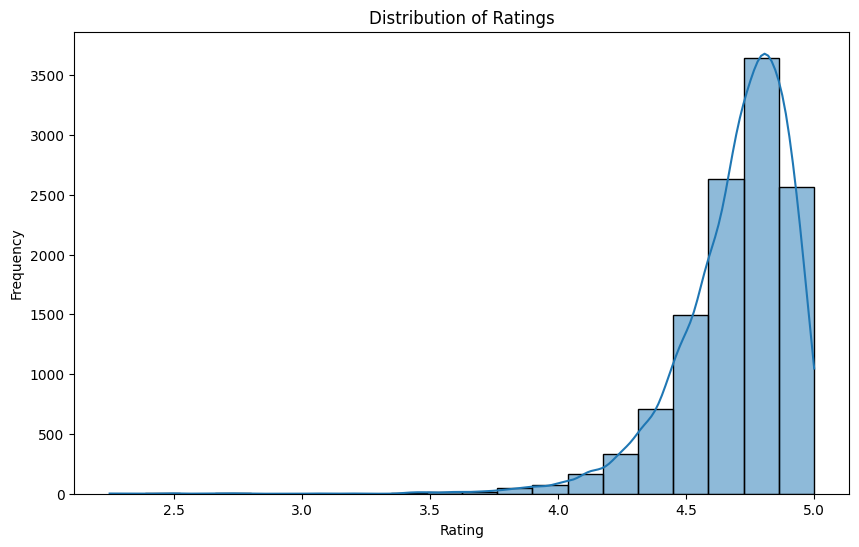

In [18]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

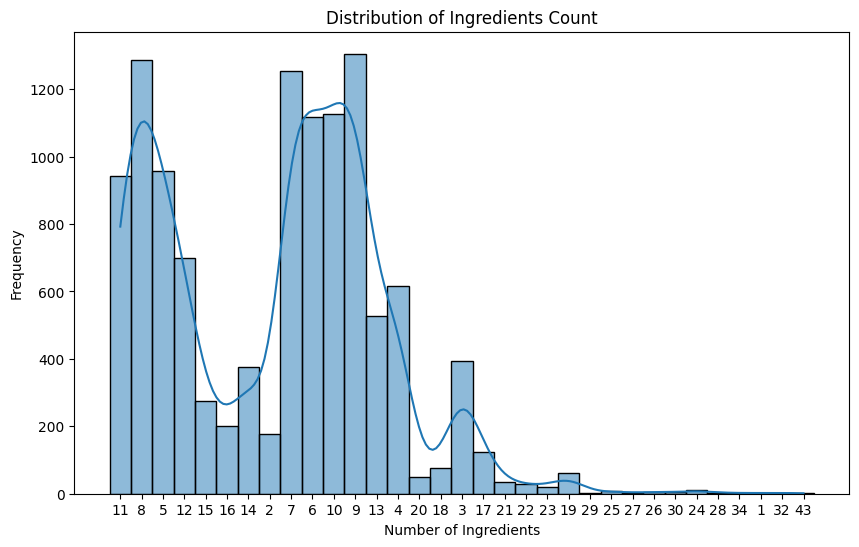

In [20]:
# Distribution of Ingredients Count
plt.figure(figsize=(10, 6))
sns.histplot(df['Fact_Ingredients'], bins=20, kde=True)
plt.title('Distribution of Ingredients Count')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

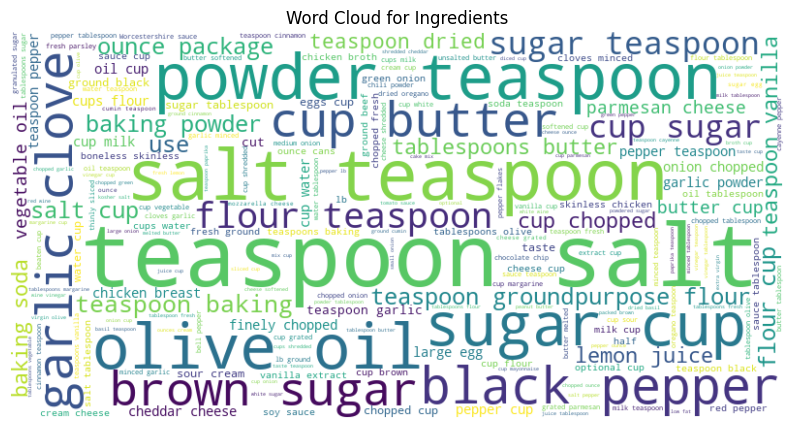

In [23]:
# Word Cloud for Ingredients
ingredients_text = ' '.join(df['Ingredients'].fillna('').str.replace('\n', ' '))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ingredients')
plt.show()

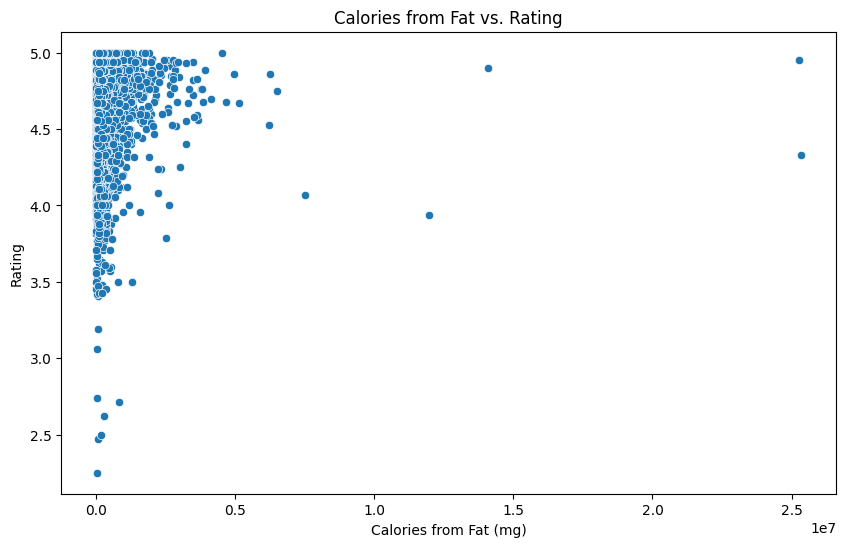

In [24]:
# Calories vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories from Fat', y='Rating', data=df)
plt.title('Calories from Fat vs. Rating')
plt.xlabel('Calories from Fat (mg)')
plt.ylabel('Rating')
plt.show()